<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-description" data-toc-modified-id="Problem-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem description</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Submission</a></span></li><li><span><a href="#Solution" data-toc-modified-id="Solution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solution</a></span></li><li><span><a href="#Application:-Photometric-Stereo" data-toc-modified-id="Application:-Photometric-Stereo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Application: Photometric Stereo</a></span><ul class="toc-item"><li><span><a href="#Images-to-normals" data-toc-modified-id="Images-to-normals-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Images to normals</a></span></li><li><span><a href="#Normals-to-gradients" data-toc-modified-id="Normals-to-gradients-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Normals to gradients</a></span></li><li><span><a href="#Gradients-to-surface" data-toc-modified-id="Gradients-to-surface-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gradients to surface</a></span></li></ul></li><li><span><a href="#Summary-&amp;-future-directions" data-toc-modified-id="Summary-&amp;-future-directions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary &amp; future directions</a></span></li></ul></div>

# Problem description

**Photometric stereo**

In this problem you implement another tool needed for an algorithm from computer vision called *photometric stereo*, allowing us to reconstruct a 3D object's surface from 2D images of it under different lighting conditions.

Figure 1 gives a sneak peek at what you'll be able to do after completing all the pieces.

<img src="hp073_cat_images.png"  style="width: 81%; float:left;"/>
<img src="hp073_cat_surface.png" style="width: 17%; float:right;"/>
<br style="clear: both;" />
<center>
**Figure 1.**
Photometric stereo.
Left: 2D images of a common scene under different lighting conditions.
Right: 3D surface reconstruction computed from the input images.
</center>

Suppose we are in a dark room with an object on a dark table, a camera fixed above it, and a moveable light source.
We model the object surface as a surface $z = f(x,y)$ where $(x,y)$ denotes coordinates on the table and $z$ is height above the table.
Assume that a $m \times n$ sized image $I(x,y)$ is a representation of $f(x,y)$ for each $(x,y)$ tuple.
(Given one light source, $f(x,y)$ is the $z$ coordinate of the position where a ray of light hits the surface at $(x,y,z)$.)

As seen in Figure 1, the pixel intensity $I(x,y)$ indicates how much light reflects off the surface $f(x,y)$.
If our object is diffuse (also called matte or Lambertian), one can derive the relationship
$$
I(x,y) = \alpha(x,y) (\ell^T n(x,y)),
\qquad (1)
$$
where $\ell \in \mathbb{R}^3$ is a unit vector describing the orientation of the incident light rays on the surface, $n(x,y) \in \mathbb{R}^3$ is the unit-norm surface normal vector of $f$ at $(x,y,f(x,y))$, and $\alpha(x,y) > 0$ is a scaling constant called the surface albedo.

Now suppose that we take $d$ images $I_1,\ldots,I_d$ of our object, with lighting directions $\ell_1,\ldots,\ell_d$.
For any $(x,y)$, we can stack (1) into an overdetermined system of equations:
$$
\underbrace{
\begin{bmatrix} I_1(x,y) \\ \vdots \\ I_d(x,y) \end{bmatrix}
}_{=:I_{xy}}
\approx
\underbrace{
\begin{bmatrix} \ell_1 & \ldots & \ell_d \end{bmatrix}^T
}_{=:L^T}
\underbrace{\left(\alpha(x,y) n(x,y)\right)}_{=:\rho(x,y)}.
\qquad (2)
$$

We could solve (2) for $\rho(x,y)$ when $d = 3$, but, in practice, when there is noise and our assumptions
do not hold exactly, a more robust approach is to take $d > 3$ images in the least-squares problem
$$
\rho(x,y) = \arg \min_{\rho \in \mathbb{R}^3} \|I_{xy} - L^T \rho\|_2^2
\qquad (3)
$$
and approximate
the surface norm
$n$ by $n^{*}$
$$
n^*(x,y) = \frac{\rho(x,y)}{\|\rho(x,y)\|_2}.
\qquad (4)
$$


# Submission

Your task for this problem is to write a function called `compute_normals` that computes the unit-norm surface normal vectors for each pixel in a scene by solving (3).

**Hint:** `Julia`'s `normalize` function may come in handy.

**Note:** The surface normals at each pixel are independent, so you can compute them all simultaneously by stacking (3) for each pixel into a single matrix-valued least-squares problem. This can be expressed very elegantly without using loops!

In [1]:
using LinearAlgebra
function compute_normals(I, L)
#
# Syntax:       N = compute_normals(I, L)
#
# Inputs:       I is an m x n x d matrix whose d slices contain m x n images
#               of a common scene under different lighting conditions
#
#               L is a 3 x d matrix whose columns are the lighting direction
#               vectors for the images in I, with d >= 3
#
# Outputs:      N is an m x n x 3 matrix containing the unit-norm
#               surface normal vectors for each pixel in the scene
#
    m, n, d = size(I) # Parse inputs
    
    L = mapslices(normalize, L, dims = 1) # Normalize lighting direction vectors
    
    ## TODO: Compute N matrix via least-squares -- use pinv as appropriate
   
    N = reshape(I, m*n,d) * pinv(L)
    N = reshape(N, m, n, 3)
    
    N = mapslices(normalize, N, dims = 3) # Returned normalized normal vectors

    return N
end

compute_normals (generic function with 1 method)

# Solution

A possible `Julia` implementation is
```julia
function compute_normals(I, L)
#
# Syntax:       N = compute_normals(I, L)
#
# Inputs:       I is an m x n x d matrix whose d slices contain m x n images
#               of a common scene under different lighting conditions
#
#               L is a 3 x d matrix whose columns are the lighting direction
#               vectors for the images in I, with d >= 3
#
# Outputs:      N is an m x n x 3 matrix containing the unit-norm
#               surface normal vectors for each pixel in the scene
#
    m, n, d = size(I) # Parse inputs
    L = mapslices(normalize, L, 1) # Normalize lighting direction vectors

    # Solve least squares problem
    # Here, using pinv() is efficient because L is a small matrix
    # and we apply pinv(L) to many (mn) pixels.
    I = reshape(I, m * n, d)
    N = I * pinv(L)
    N = reshape(N, m, n, 3)

    N = mapslices(normalize, N, 3) # Normalize normal vectors
    return N
end
```

Another possible `Julia` implementation is
```julia
function compute_normals(I, L)
#
# Syntax:       N = compute_normals(I, L)
#
# Inputs:       I is an m x n x d matrix whose d slices contain m x n images
#               of a common scene under different lighting conditions
#
#               L is a 3 x d matrix whose columns are the lighting direction
#               vectors for the images in I
#
# Outputs:      N is an m x n x 3 matrix containing the unit-norm
#               surface normal vectors for each pixel in the scene
#

    m, n, d = size(I) # Parse inputs
    L = mapslices(normalize, L, 1) # Normalize lighting direction vectors
    pL = pinv(L') # Precompute pinv
    N = mapslices((v) -> pL*v, I, 3) # Apply pinv to each pixel
    N = mapslices(normalize, N, 3) # Normalize normal vectors
    return N
end
```

# Application: Photometric Stereo

Recall the first difference 2D matrix from earlier? Enter it here.

In [2]:
using SparseArrays, LinearAlgebra
function first_diffs_2d_matrix(m, n)
#
# Syntax:       A = first_diffs_2d_matrix(m, n)
#               
# Inputs:       m and n are positive integers
#               
# Outputs:      A is a 2mn x mn sparse matrix such that A * X[:] computes the
#               first differences down the columns (along x direction)
#               and across the (along y direction) of the m x n matrix X
#
     Dn = spdiagm(0 => -ones(n), 1 => ones(n-1))
     Dn[n, 1] = 1    
    
     Dm = spdiagm(0 => -ones(m), 1 => ones(m-1))
     Dm[m, 1] = 1    
      
     In = spdiagm(0 => ones(n))
     Im = spdiagm(0 => ones(m))
    
     A = vcat(kron(In,Dm),kron(Dn,Im) )
   
    return A
     
end

first_diffs_2d_matrix (generic function with 1 method)

Now comes the fun part! Let us put all the pieces together and see how you can create a 3D image from the images as suggested in Figure 1. To that, end, we will first have to load some packages as in the next cell.

In [3]:
# Dependencies
using IterativeSolvers # for lsqr()
using MAT # for reading .mat file with matread()
using Plots; gr()

Plots.GRBackend()

## Images to normals

We load the images of a cat -- these are pictures that have been collected by illuminating the cat from different angles but keeping the camera position fixed. 

In [4]:
# Dataset
vars = matread("cat_xy.mat")

# Load data
I = vars["I"]
M = vars["M"]
L = vars["L"]
m, n, d = size(I)
@show size(I)
@show size(M)
@show size(L)

size(I) = (430, 550, 12)
size(M) = (430, 550)
size(L) = (3, 12)


(3, 12)

Let us dispay `p` images of the cat as in the next cell. Notice how the illumination changes subtly. It is not all the same picture. The remarkable fact is that there is information about the shape in these subtle changes!

In [ ]:
# Display p ≤ d of the input images
p = 3
rowify = (I) -> reshape(permutedims(I, [1 3 2]), :, size(I,2))
heatmap(1:m*p, 1:n,
    rowify(I[:,:,1:p]),
    transpose=true, aspect_ratio=1, yflip=true, color=:grays,showaxis=:false,
    title = "first $p input images",
    xticks=[1,m], yticks=[1,n])

We now use the `compute_normals` function you succesfully programmed to compute the unit-normals from the images.  

In [6]:
# Compute unit-normals from images
N = compute_normals(I, L)

@show size(N)

size(N) = (430, 550, 3)


(430, 550, 3)

Let us display the $x$, $y$ and $z$ components of the normal vectors as images as in the next cell 

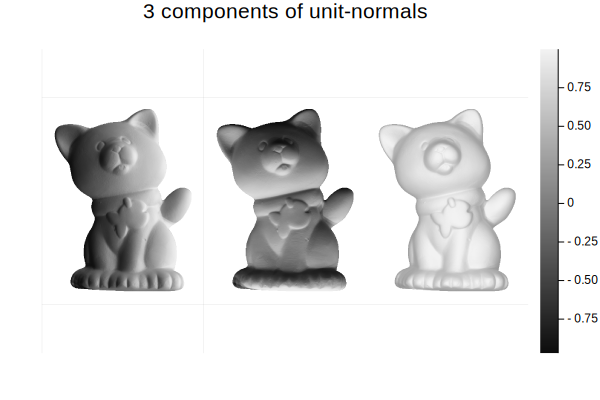

In [7]:
# display the 3 components of the normal vectors as images
heatmap(1:m*3, 1:n,
    rowify(N),
    transpose=true, aspect_ratio=1, yflip=true, color=:grays, showaxis=:false,
    title = "3 components of unit-normals",
    xticks=[1,m], yticks=[1,n])

## Normals to gradients

Now that we have the normal vectors of our surface, let's reconstruct the surface itself!

To that end, recall from vector calculus that we can express the surface normal vector as

$$
n(x,y) = \frac{\begin{bmatrix} -\displaystyle\frac{\partial f(x,y)}{\partial x}, & -\displaystyle\frac{\partial f(x,y)}{\partial y}, & 1 \end{bmatrix}^T}{\sqrt{1 + \displaystyle\frac{\partial f(x,y)}{\partial x}^2 + \displaystyle\frac{\partial f(x,y)}{\partial y}^2}},
$$

where $~\partial f(x,y) / \partial x~$ and $~\partial f(x,y) / \partial y~$ are the partial derivatives of $f$ with respect to $x$ and $y$. From the above equation, we can compute the partial derivatives as follows

$$
\frac{\partial f(x,y)}{\partial x} = -\frac{n_1(x,y)}{n_3(x,y)}
$$

$$
\frac{\partial f(x,y)}{\partial y} = -\frac{n_2(x,y)}{n_3(x,y)},
$$

where

$$
n(x,y) = \begin{bmatrix} n_1(x,y), & n_2(x,y), & n_3(x,y) \end{bmatrix}^T.
$$

Now let's compute approximate the $x$ and $y$ gradients of our surface using the above strategy.

In [8]:
# Compute gradients from normals
DFDX = -N[:, :, 1] ./ N[:, :, 3]
DFDY = -N[:, :, 2] ./ N[:, :, 3]
DFDX[.!isfinite.(DFDX) .| .!M] .= 0          # Clean data and apply mask
DFDY[.!isfinite.(DFDY) .| .!M] .= 0          # Clean data and apply mask

@show size(DFDX)
@show size(DFDY)

size(DFDX) = (430, 550)
size(DFDY) = (430, 550)


(430, 550)

Having computed the gradients, let us visualize them as in the next cell. 

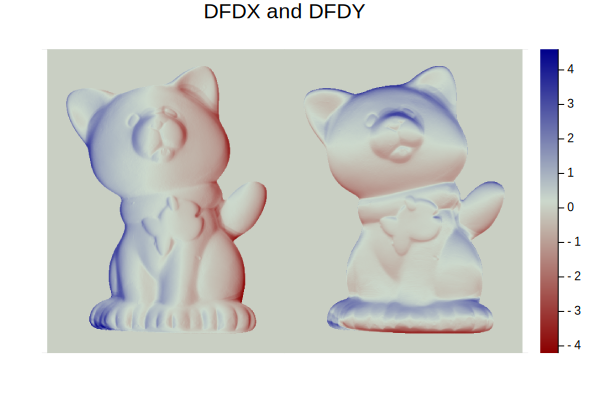

In [9]:
# display the gradients
heatmap(1:m*2, 1:n,
    cat(dims = 1, DFDX, DFDY), # feline pun intended?
    transpose=true, aspect_ratio=1, yflip=true, color=:redsblues, showaxis=:false,
    title = "DFDX and DFDY",
    xticks=[1,m], yticks=[1,n])

## Gradients to surface

To estimate the surface from its gradients, use the finite differences approximations:

$$
\begin{array}{rcl}
\displaystyle\frac{\partial f(x,y)}{\partial x} &\approx& \displaystyle\frac{f(x + 1,y) - f(x,y)}{(x + 1) - x} \\
&=& f(x + 1,y) - f(x,y)
\end{array}
$$

and

$$
\begin{array}{rcl}
\displaystyle\frac{\partial f(x,y)}{\partial y} &\approx& \displaystyle\frac{f(x,y + 1) - f(x,y)}{(y + 1) - y} \\
&=& f(x,y + 1) - f(x,y),
\end{array}
$$

These relationships give us an overdetermined linear system of $2mn$ equations that we can solve to estimate our surface $f(x,y)$ given its partial derivatives on the grid
$x = 1,\ldots,m$ and
$y = 1,\ldots,n$.

To simplify notation,
define the $m \times n$ matrices `FXY`, `DFDX`, and `DFDY` such that

$$
\begin{array}{rcl}
\texttt{FXY(i,j)} &=& f(i,j) \\
\texttt{DFDX(i,j)} &=& \frac{\partial f(i,j)}{\partial x} \\
\texttt{DFDY(i,j)} &=& \frac{\partial f(i,j)}{\partial y}
\end{array}
$$

Then, if we let $A$ denote the 2D first differences matrix returned by your  **first_diffs_2d_matrix**  function, then we have the relationship

$$ \texttt{b} \approx A ~ \texttt{fxy} $$

where, in Julia:

```julia
b = [DFDX[:]; DFDY[:]]
fxy = FXY[:]
```

Let's now construct this system!

In [10]:
# Generate least squares problem
A = first_diffs_2d_matrix(m, n)
b = [DFDX[:]; DFDY[:]]

@show size(A)
@show size(b)

size(A) = (473000, 236500)
size(b) = (473000,)


(473000,)

Now that we have `A` and `b`, all that remains is to solve the least squares problem

$$\texttt{fxy} = \arg\min_{f \in \mathbb{R}^{mn}} \|b - Af\|^2$$

for our (vectorized) surface, `fxy`. Note that this is equivalent to "integrating out" the surface normals to get the surface.

Note that `A` is a  *gigantic*  (sparse) matrix with over  **100 billion**  entries, so computing $A^{\dagger} b$ directly is impossible!!

Instead, we will use the built-in iterative solver `lsqr` to do the job. We  display the surface as a 3-D plot and also as a heatmap in the cell below.  

In [11]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4452361583094427918\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5747357121629707638\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4452361583094427918\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [0]:
iters = 1000
# Solve least squares problem (patience needed)
@time fxy = lsqr(A, b, maxiter = iters)
FXY = reshape(fxy, m, n)

# Format surface
FXY .-= minimum(FXY[M]) # Anchor to z axis
FXY .*= M               # Zero data outside of mask
    
p_surface = plot(FXY,
    st = :surface,
    color = :deep_r,
    title = "Reconstruction after $iters iterations")
    
    p_image = heatmap(1:m, 1:n, FXY,
    transpose=true, aspect_ratio=1, yflip=true, color=:redsblues,
    title = "f(x,y)",
    xticks=[1,m], yticks=[1,n])
    
plot(p_surface, p_image, layout = (1,2))
    

# Summary & future directions

In this application we were given a picture of a 3D object from the same angle and a couple of different lighting positions -- we assumed that the lighting locations were known. We then used this information to compute the surface normals vector and then "integrated out" the normals vector to get the surface via least squares.

More recently, researchers have used a *single image* to perform the 3-D reconstruction as described in the popular press article [here](https://www.engadget.com/2017/09/19/ai-3d-face-single-photo/). The method is described in greater detail [here](https://arxiv.org/pdf/1703.07834.pdf) -- the researchers use a training data set of images for which the 3-D shape is known -- they learn the mapping a patch (say, an 8 x 8 segment of the image) and the corresponding 3-D coordinates; this is what they refer to as a volumetric regression network. The new image is then segmented into patches and this learned transform is applied to each patch to yield the corresponding 3-D coordinates. The final 3-D shape is rendered together by stitching together and smoothing the respect 3-D patches.

Try it with your own face [here](http://cvl-demos.cs.nott.ac.uk/vrn/)

and submit the file with your homework. Comment on how well it does.